In [6]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
class Car:
    "sdfsf"

T=5000
l=500 #總長
P=[] #所有時間所有狀態
p=0.8 #減速機率

t=[] #時間(長度和P一樣)



p2=0.3 #進車機率
def f(l):
    return l[0]
#排序用的function 可不管
def prob(x):
    a=random.randint(1,10)
    if a<=x*10:
        return True
    else:
        return False
    # x的機率是true 1-x的機率是False
def ini(n,V_max):
    
    S=[] #儲存某個時間點個個車子的狀態
    rad_x=random.sample(range(l),n)
    for i in range(n):
        x=Car()
        x.pos=rad_x[i]
        x.v=random.randint(0,V_max)
        
        S.append([x.pos,x.v])
    S.sort(key=f)

    return S
   #初始化
def avg(x):
    
    for i in range(len(x)):
        if i==0:
            pass
        else:
            x[i]+=x[i-1]
    return x[len(x)-1]/len(x)
    
    




In [11]:
rho=[] #各個時刻的密度
t_rho=[] #用來化密度-t圖的
def traffic(n,V_max):
    #n是車子數量
    S=ini(n,V_max)
    
    V=[] #計算平均速度用的
    for j in range(T):
        rho.append(len(S)/l)
        t_rho.append(j)
        
        #每個時段內發生的事
        for i in range(len(S)):
            x=len(S)-1
            t.append(j) 
            P.append(S[x-i][0])
        #每台車的狀況
            if S[x-i][1]<V_max:
                S[x-i][1]+=1
            #(1)沒到上限就加速1單位    
            
            if i>0 :
                if S[x-i][1]>=(S[x-i+1][0]-S[x-i][0]):
                    S[x-i][1]=S[x-i+1][0]-S[x-i][0]-1
                    if S[x-i][1]<0:
                        print(S[x-i+1][0],S[x-i][0],S[x-i][1],j,i)
                        break
            #(2)速度比前車快的話就減速至跟距離一樣的大小避免相撞
            if prob(p)==True and S[x-i][1]>0:
                S[x-i][1]-=1
            #(3)p機率減速1單位
        for k in range(len(S)):
            S[k][0]+=S[k][1]
            V.append(S[k][1])
            
            #(4)更新車子的位置
        
               
    
        if S[len(S)-1][0]>l:
            S.remove(S[len(S)-1])
        #(5)超出去的就刪掉
        if prob(p2) and S[0][0]!=0 :
            S.insert(0,[0,random.randint(0,V_max)])
        #(6)入口進車的判斷  
    
    avg_V=avg(V) #每個n對應到的平均速度
    return avg_V 
P=[]
t=[]
traffic(200,5)
            
  

0.619620038673923

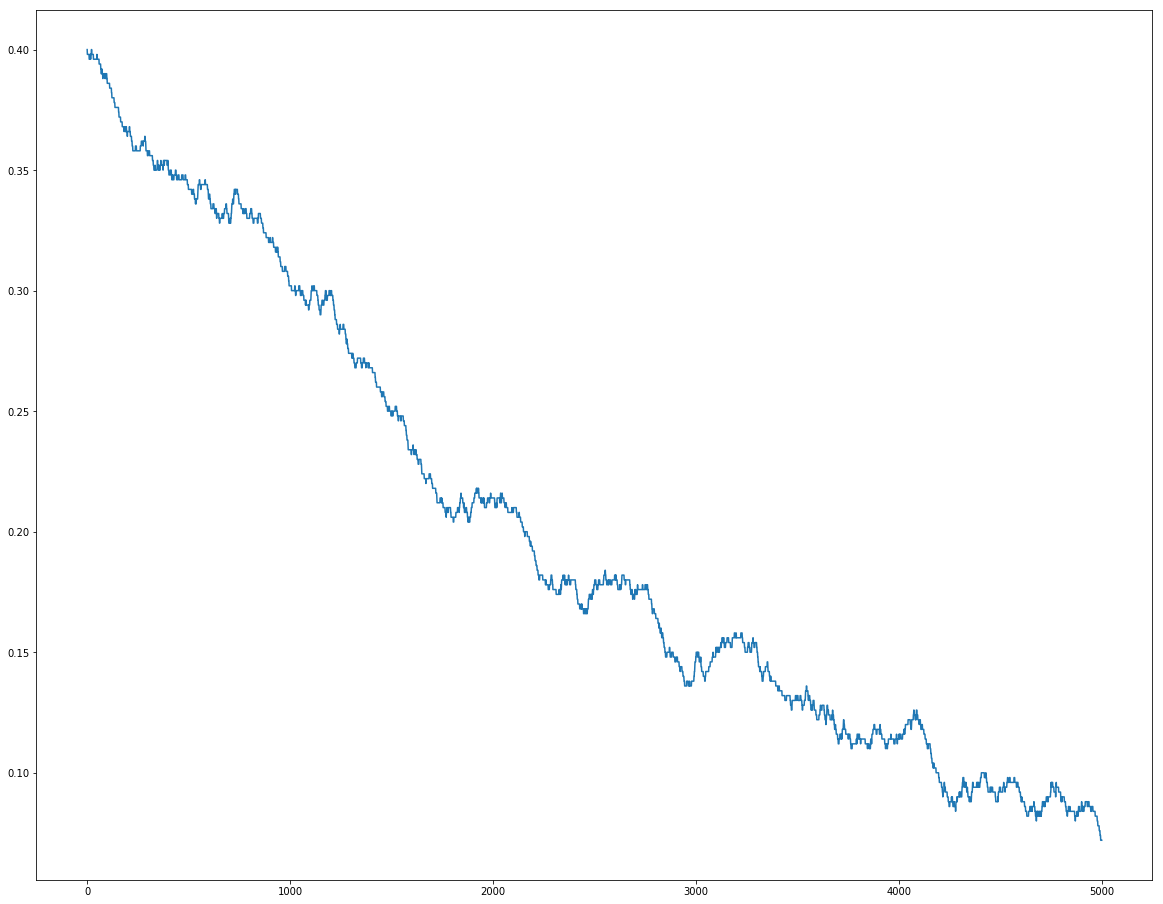

In [12]:
plt.figure(figsize=(20,16))
#plt.xlim(0, 100)
#plt.ylim(0, 500)
#plt.scatter(t,P) #X 時間    Y 位置
plt.plot(t_rho,rho)

In [17]:
#Vbar 和 ro
Vbar=[] #蒐集各個n的平均速度
ro=[] #密度
for i in range(1,500,10):
    Vbar.append(traffic(i,5))
    ro.append(i)
    print(i)

1
11
21
31
41
51
61
71
81
91
101
111
121
131
141
151
161
171
181
191
201
211
221
231
241
251
261
271
281
291
301
311
321
331
341
351
361
371
381
391
401
411
421
431
441
451
461
471
481
491


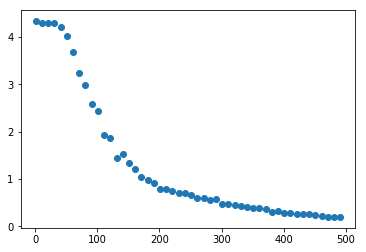

In [19]:

plt.scatter(ro,Vbar)


In [134]:
#流量=平均速度*密度
for i in range(len(Vbar)):
    q[i]=Vbar[i]/ro[i]

In [13]:
#平均車距
for i in range(len(ro)):
    ro[i]=ro[i]/500
